In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/Alura-COVID2/main/casos-brasil.csv")

In [3]:
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [4]:
df["data"] = pd.to_datetime(df["data"])

In [5]:
df_sp = df[df["estado"] == "SP"]
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [7]:
df_sp.index = pd.to_datetime(df_sp["data"])

In [8]:
resultados = seasonal_decompose(df_sp["novosObitos"], freq = 7)

In [9]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    
    plt.figure(figsize = (20, 7))
    plt.plot(y1, color = cor1, label = label1)
    plt.plot(y2, color = cor2, label = label2)
    plt.plot(y3, color = cor3, label = label3)
    plt.legend(fontsize = 18)

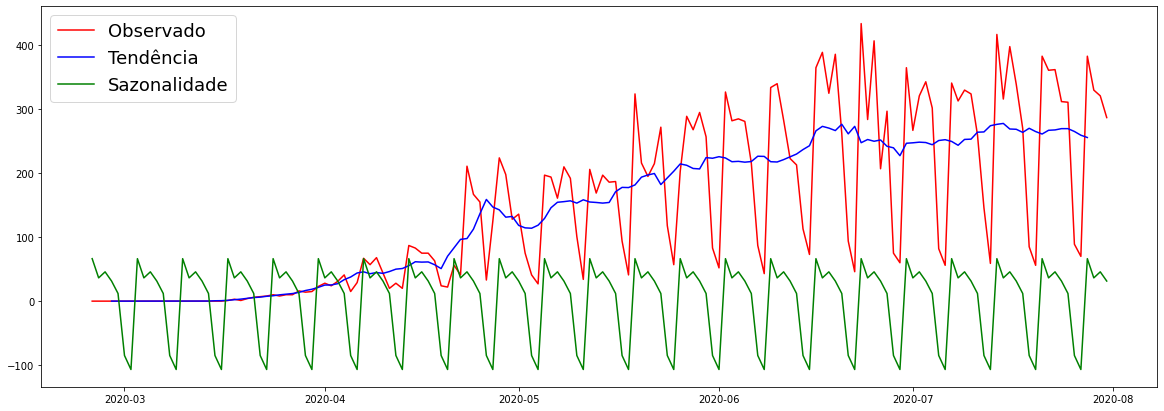

In [10]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, "red", "blue", "green", 
      "Observado", "Tendência", "Sazonalidade")

In [11]:
df_mg = df[df["estado"] == "MG"]
df_mg.index = pd.to_datetime(df_mg["data"])

df_rj = df[df["estado"] == "RJ"]
df_rj.index = pd.to_datetime(df_rj["data"])

In [12]:
resultados_mg = seasonal_decompose(df_mg["novosObitos"], freq = 7)
resultados_rj = seasonal_decompose(df_rj["novosObitos"], freq = 7)

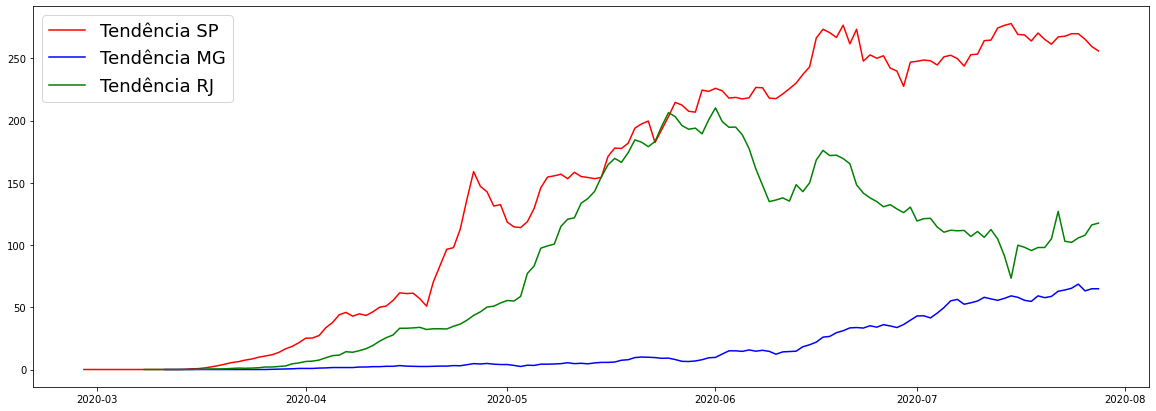

In [13]:
plotar(resultados.trend, resultados_mg.trend, resultados_rj.trend, "r", "b", "g", 
       "Tendência SP", "Tendência MG", "Tendência RJ")

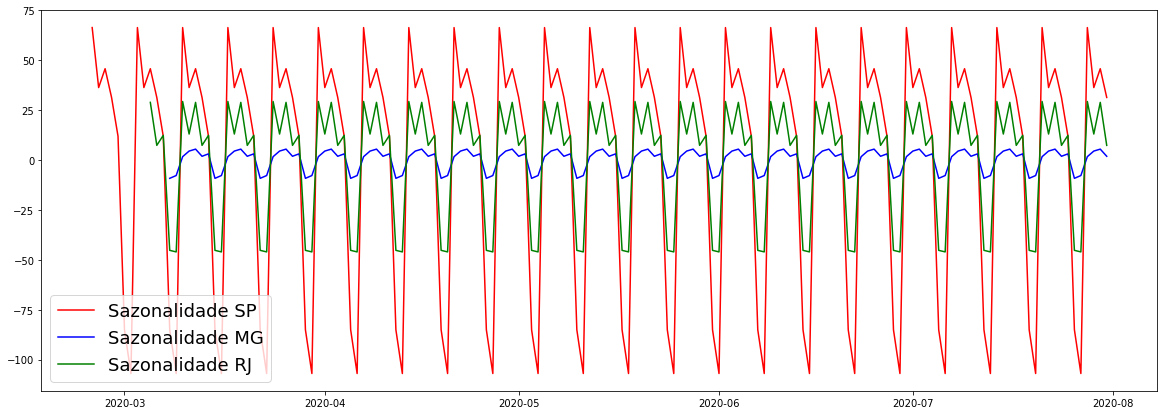

In [14]:
plotar(resultados.seasonal, resultados_mg.seasonal, resultados_rj.seasonal, "r", "b", "g", 
       "Sazonalidade SP", "Sazonalidade MG", "Sazonalidade RJ")

In [15]:
y = df_sp["Casos"]
y.head()

data
2020-02-25    1
2020-02-26    1
2020-02-27    1
2020-02-28    2
2020-02-29    2
Name: Casos, dtype: int64

In [16]:
from statsmodels.tsa.stattools import adfuller

adfuller(y.dropna())

(1.3664743612803494,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2627.7242380318335)

In [17]:
print("P-valor: ", adfuller(y.dropna())[1])

P-valor:  0.9969563888815705


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [19]:
def plotar_acf(y1, y2, y3):
    
    fig = plt.figure(figsize = (10, 10))
    
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax = ax1, title = "Original")
    
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax = ax2, title = "Primeira diferenciação")
    
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax = ax3, title = "Segunda diferenciação")

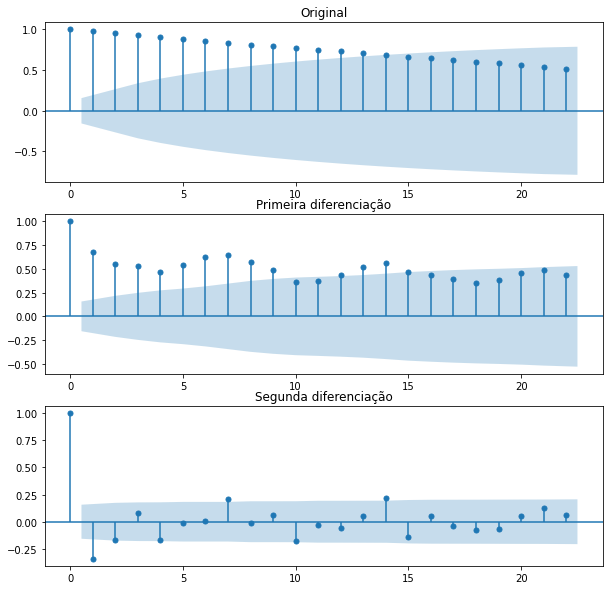

In [20]:
plotar_acf(y, y.diff().dropna(), y.diff().diff().dropna())

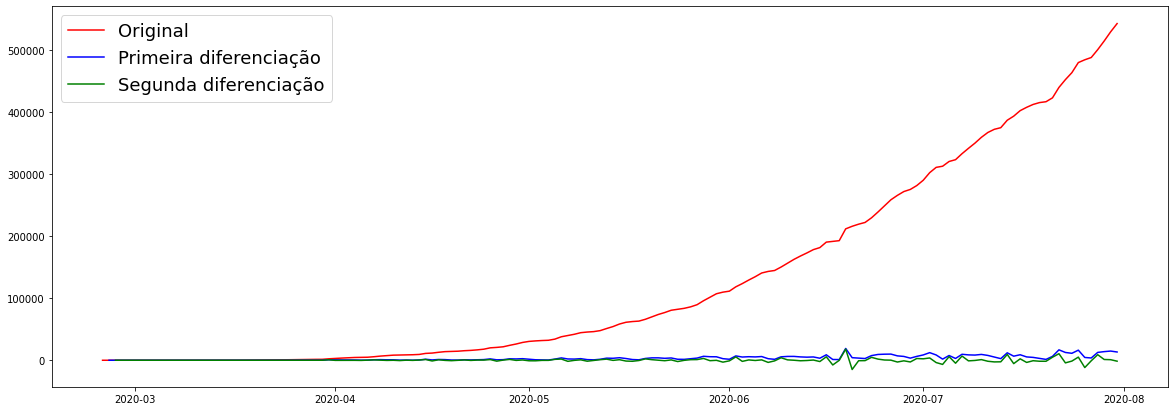

In [21]:
plotar(y, y.diff().dropna(), y.diff().diff(), "r", "b", "g", "Original", "Primeira diferenciação", "Segunda diferenciação")

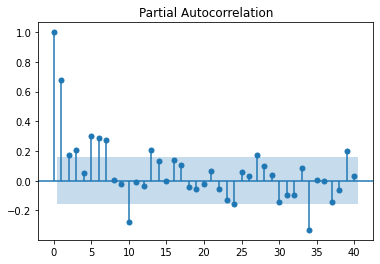

In [22]:
plot_pacf(y.diff().dropna(), lags = 40);

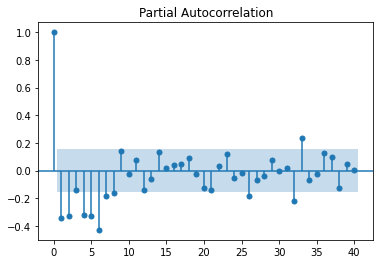

In [23]:
plot_pacf(y.diff().diff().dropna(), lags = 40);

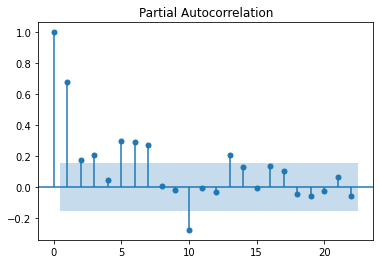

In [24]:
plot_pacf(y.diff().dropna());

## ARIMA (p = 1, d = 1, q = 1)

- p: p-valor
- d: ordem da diferenciação
- q: resíduos

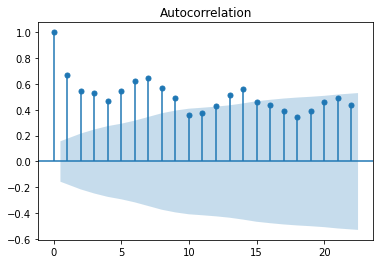

In [25]:
plot_acf(y.diff().dropna());

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
modelo = ARIMA(y, order = (1, 1, 1))
modelo_fit = modelo.fit(disp = 0)
modelo_fit.summary()

c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Casos   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1457.919
Method:                       css-mle   S.D. of innovations           2588.967
Date:                Fri, 06 Aug 2021   AIC                           2923.837
Time:                        11:25:58   BIC                           2936.062
Sample:                    02-26-2020   HQIC                          2928.802
                         - 07-31-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5023.2939   4393.445      1.143      0.253   -3587.701    1.36e+04
ar.L1.D.Casos     0.9967      0.005    216.238      0.000       0.988       1.006
ma.L1.D.Casos    -0.8462      0.040    -21.155      0.000      -0.925      -0.768
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0034           +0.0000j            1.0034            0.0000
MA.1            1.1817           +0.0000j            1.1817            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [29]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [30]:
y = df_sp["Casos"]
y

data
2020-02-25         1
2020-02-26         1
2020-02-27         1
2020-02-28         2
2020-02-29         2
               ...  
2020-07-27    487654
2020-07-28    500301
2020-07-29    514197
2020-07-30    529006
2020-07-31    542304
Name: Casos, Length: 158, dtype: int64

In [31]:
import statsmodels.api as sm

aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, 
                                       order = param,
                                       seasonal_order = param_seasonal,
                                       enforce_stationarity = False)
        results = mod.fit()
        aic_lista.append("ARIMA {} x {} - AIC {}".format(param, param_seasonal, results.aic))

c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\ope

In [32]:
aic_lista

['ARIMA (0, 0, 0) x (0, 0, 0, 7) - AIC 4285.924688301162',
 'ARIMA (0, 0, 0) x (0, 0, 1, 7) - AIC 4008.631366184684',
 'ARIMA (0, 0, 0) x (0, 1, 0, 7) - AIC 3540.3361369488894',
 'ARIMA (0, 0, 0) x (0, 1, 1, 7) - AIC 3256.1719674537026',
 'ARIMA (0, 0, 0) x (1, 0, 0, 7) - AIC 3181.2967003949466',
 'ARIMA (0, 0, 0) x (1, 0, 1, 7) - AIC 3121.0154298800285',
 'ARIMA (0, 0, 0) x (1, 1, 0, 7) - AIC 2982.247516959018',
 'ARIMA (0, 0, 0) x (1, 1, 1, 7) - AIC 2939.2621424024755',
 'ARIMA (0, 0, 1) x (0, 0, 0, 7) - AIC 4147.049464107854',
 'ARIMA (0, 0, 1) x (0, 0, 1, 7) - AIC 3937.9030815924925',
 'ARIMA (0, 0, 1) x (0, 1, 0, 7) - AIC 3323.187983418197',
 'ARIMA (0, 0, 1) x (0, 1, 1, 7) - AIC 3099.8339883875387',
 'ARIMA (0, 0, 1) x (1, 0, 0, 7) - AIC 3978.191918482051',
 'ARIMA (0, 0, 1) x (1, 0, 1, 7) - AIC 3927.565765783064',
 'ARIMA (0, 0, 1) x (1, 1, 0, 7) - AIC 3264.5782489514245',
 'ARIMA (0, 0, 1) x (1, 1, 1, 7) - AIC 3220.22692637095',
 'ARIMA (0, 1, 0) x (0, 0, 0, 7) - AIC 3121.73872

In [33]:
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1, 1, 1),
                               seasonal_order = (1, 1, 1, 7),
                               enforce_stationarity = False)
results = mod.fit()

c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\usuário\opencv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


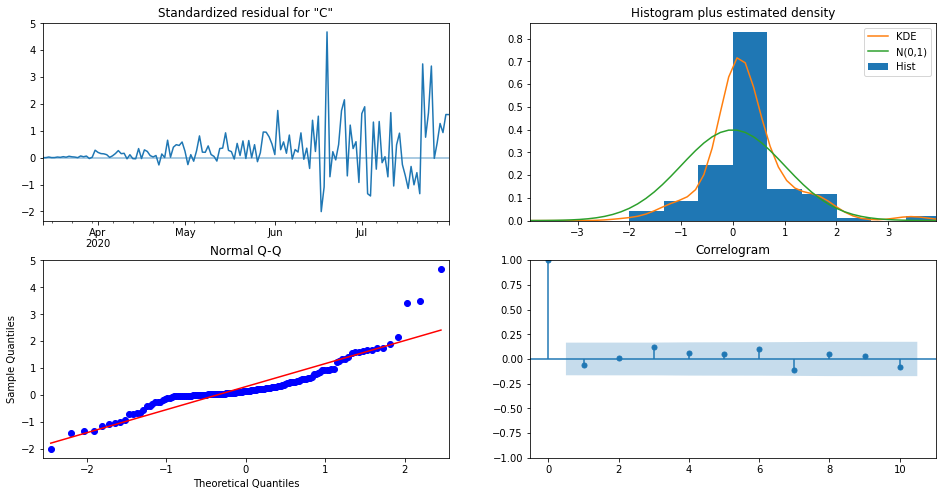

In [34]:
results.plot_diagnostics(figsize = (16, 8))
plt.show()

In [35]:
previsao = results.get_prediction(start = pd.to_datetime("2020-07-01"),
                                 dynamic = False)
previsao_intervalo_confianca = previsao.conf_int()
previsao_intervalo_confianca

,lower Casos,upper Casos
2020-07-01,280288.624250,290797.411193
2020-07-02,291844.428714,302352.937861
2020-07-03,309038.262261,319546.498745
2020-07-04,311091.404019,321599.372849
2020-07-05,311372.866660,321880.572726
2020-07-06,318959.656337,329467.104415
2020-07-07,323843.665001,334350.859752
2020-07-08,336608.733622,347115.679602
2020-07-09,344363.024374,354869.726031
2020-07-10,355766.442443,366272.904126


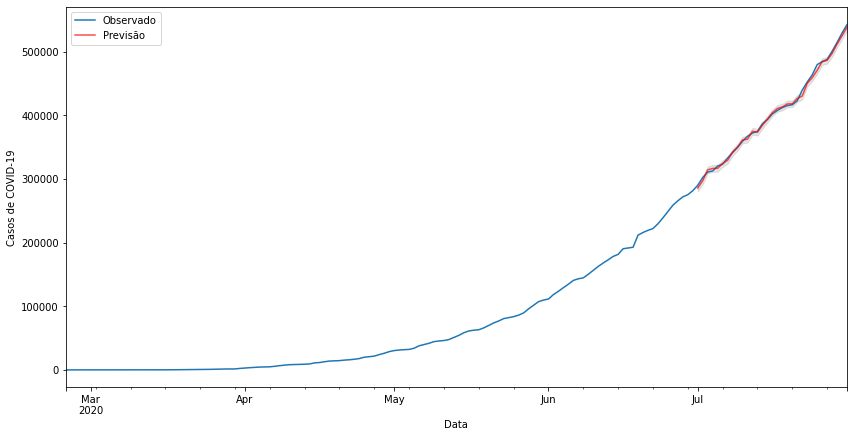

In [36]:
ax = y["2020":].plot(label = "Observado")
previsao.predicted_mean.plot(ax = ax, label = "Previsão", color = "r", alpha = 0.7, figsize = (14, 7))
ax.fill_between(previsao_intervalo_confianca.index, previsao_intervalo_confianca.iloc[:, 0],
               previsao_intervalo_confianca.iloc[:, 1], color = "k", alpha = 0.1)
ax.set_xlabel("Data")
ax.set_ylabel("Casos de COVID-19")
plt.legend()
plt.show()

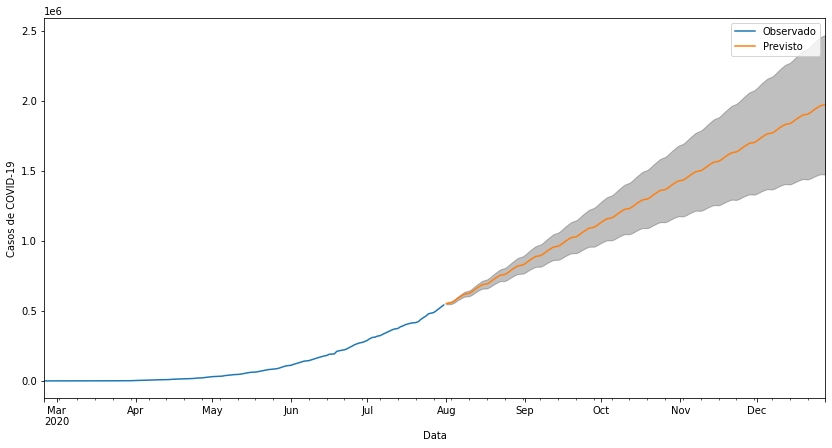

In [37]:
previsao_uc = results.get_forecast(steps = 150)
previsao_intervalo_confianca = previsao_uc.conf_int()
ax = y.plot(label = "Observado", figsize = (14, 7))
previsao_uc.predicted_mean.plot(ax = ax, label = "Previsto")
ax.fill_between(previsao_intervalo_confianca.index, previsao_intervalo_confianca.iloc[:, 0],
               previsao_intervalo_confianca.iloc[:, 1], color = "k", alpha = 0.25)
ax.set_xlabel("Data")
ax.set_ylabel("Casos de COVID-19")
plt.legend()
plt.show()

In [38]:
df_att = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/Alura-COVID2/main/cases-brazil-states-att.csv")
df_att.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [39]:
df_att = df_att[df_att["state"] == "SP"]
df_att = df_att.rename(columns = {"date": "data"})

In [40]:
df_att.dtypes

epi_week                             int64
data                                object
country                             object
state                               object
city                                object
newDeaths                            int64
deaths                               int64
newCases                             int64
totalCases                           int64
deathsMS                             int64
totalCasesMS                         int64
deaths_per_100k_inhabitants        float64
totalCases_per_100k_inhabitants    float64
deaths_by_totalCases               float64
recovered                          float64
suspects                           float64
tests                              float64
tests_per_100k_inhabitants         float64
dtype: object

In [41]:
df_att["data"] = pd.to_datetime(df_att["data"]).dt.date
df_att.index = df_att["data"]
df_att.head()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


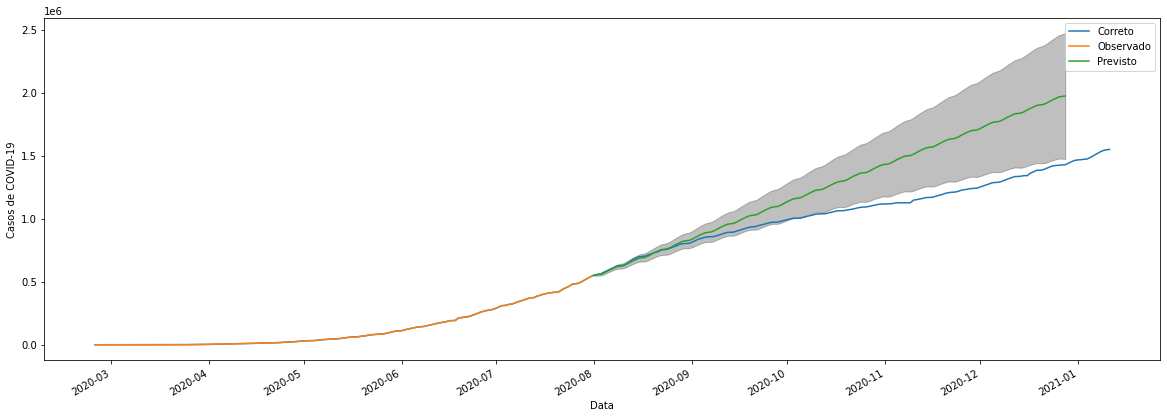

In [42]:
x = df_att["totalCases"]

plt.figure(figsize = (20, 7))
fig = plt.plot(x, label = "Correto")

ax = y.plot(label = "Observado")
previsao_uc.predicted_mean.plot(ax = ax, label = "Previsto")
ax.fill_between(previsao_intervalo_confianca.index, previsao_intervalo_confianca.iloc[:, 0],
               previsao_intervalo_confianca.iloc[:, 1], color = "k", alpha = 0.25)
ax.set_xlabel("Data")
ax.set_ylabel("Casos de COVID-19")
plt.legend()
plt.show()